# **1. Setup**

# PARTE 1 - DESARROLLO

## Establecer Entorno de Trabajo

In [1]:
# Check python version
import sys
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [2]:
!nvidia-smi

Sun Jun  9 20:24:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:01:00.0  On |                  N/A |
| 31%   37C    P3              29W / 170W |    769MiB / 12288MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Instalacion de paquetes necesarios

In [3]:
# Install pytorch for python 3.10 with CUDA 11.8 support
!pip3 install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
!pip install Pillow==9.4.0
!pip show pillow #check pillow version

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /home/merve/anaconda3/envs/pytorch_practice/lib/python3.10/site-packages
Requires: 
Required-by: matplotlib, torchvision


In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
# !mkdir /content/gdrive/My\ Drive/P1aplicacionesIA

In [7]:
# !ls /content/gdrive/My\ Drive/P1aplicacionesIA

In [8]:
#move to a specific directory
# import os
# os.chdir('/content/gdrive/My Drive/P1aplicacionesIA/')
# !pwd

# **2. Carga de conjuntos de datos/imágenes (datasets)**

## Manejo de Datasets


### Datasets por defecto

#### Descarga CIFAR10

In [9]:
import subprocess
import os
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import time
from torch.utils.data import random_split


In [10]:
download_dir = './data' #download directory
# out=subprocess.call(["mkdir",download_dir])#create directory
# os.chdir(download_dir) #move to directory

# #download file
# !wget http://www-vpu.eps.uam.es/~jcs/bigdata/Scene15.zip

# #unzip file
# !unzip -o -q Scene15.zip -d .

# #display directory
# !ls Scene15
# !ls Scene15/train
# !ls Scene15/val

In [11]:
# Resize to 128x128, RandomHorizontalFlip, RandomRotation, ToTensor, Normalize
Resize_factor = 128

# transforms and data augmentation and convert to tensor
val_transform = transforms.Compose([transforms.Resize((128,128)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_transform = transforms.Compose([transforms.Resize((128,128)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Load the data
dataset_dir = download_dir + '/Scene15'

image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transforms.Compose([train_transform if x == 'train' else val_transform])) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


print('Image resize factor:', str(Resize_factor))
print('Train dataset size:', str(len(image_datasets['train'])) + ' images')
print('Validation dataset size:', str(len(image_datasets['val'])) + ' images')



Image resize factor: 128
Train dataset size: 1500 images
Validation dataset size: 2985 images


In [12]:
# Number of samples/images per group
batch_size = 10

# Load and convert images to tensor in Python
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Get the trainloader and testloader
trainloader = dataloaders['train']
testloader = dataloaders['val']
classes = image_datasets['train'].classes

print('Loaders created')
print('Each batch with', str(batch_size), 'images')
print('Train dataset with', str(len(trainloader.dataset)), 'images')
print('Test dataset with', str(len(testloader.dataset)), 'images')
print('Available classes:', classes)

Loaders created
Each batch with 10 images
Train dataset with 1500 images
Test dataset with 2985 images
Available classes: ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


#### Visualización

In [13]:
# function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 #desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels for 10 images:
TallBuilding Mountain Industrial Store Mountain TallBuilding Office OpenCountry Highway TallBuilding 

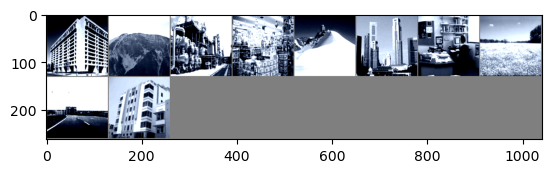

In [14]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Concatenate images
imgconcat = torchvision.utils.make_grid(images)

# Show image
imshow(imgconcat)

print("Labels for 10 images:")

for i in range(10):
  print(classes[labels[i]], end = ' ')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


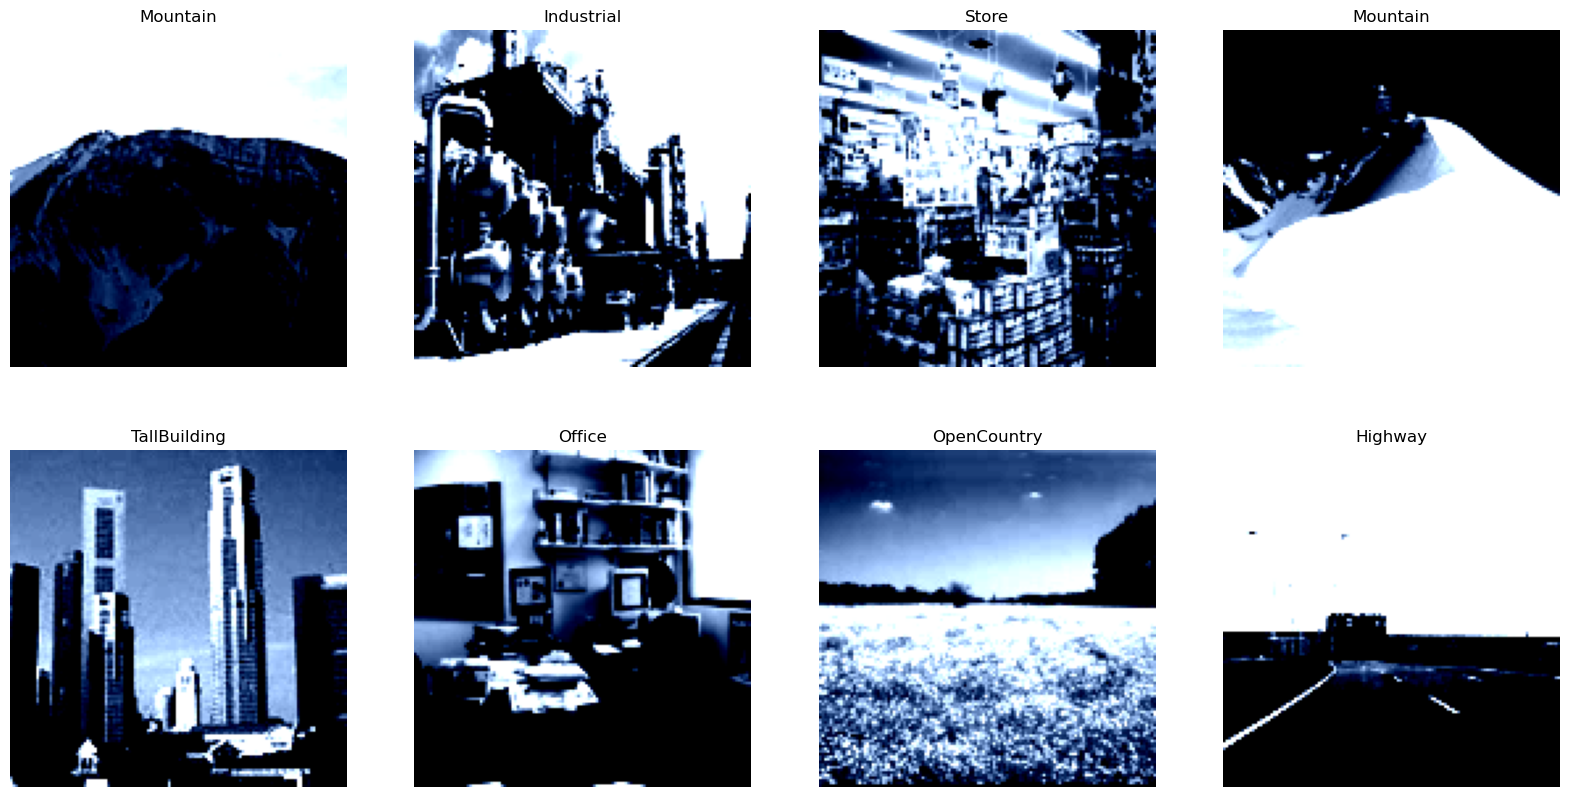

In [15]:
# Get class names
class_names = image_datasets['train'].classes

# Display some sample images
rows = 2
columns = 4
fig = plt.figure(figsize=(20, 10))
for i in range(1, columns*rows + 1):
  img = images[i]
  fig.add_subplot(rows, columns, i)
  plt.title(class_names[labels[i]])
  plt.axis('off')
  plt.imshow(img.permute(1, 2, 0))
plt.show()

### Bonus Transformaciones de Los Datos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


LivingRoom


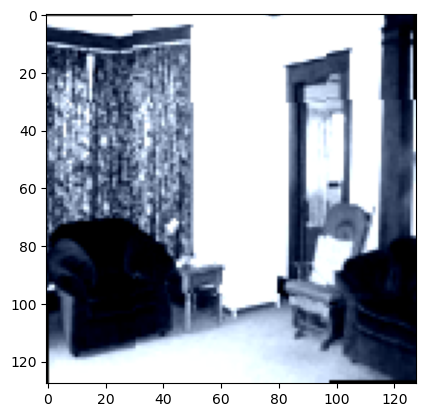

In [16]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = next(dataiter)

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


LivingRoom


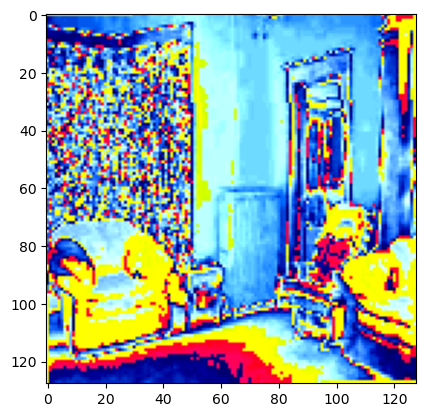

In [17]:
to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = val_transform(img)
imshow(imtran)
print ('%5s' % classes[labels[0]])

# **3. Definición de la red neuronal convolucional**

In [18]:
class Scene15CNN(nn.Module):
    def __init__(self):
        super(Scene15CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # Global average pooling
            nn.Flatten(),
            nn.Linear(512, 15)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.classifier(x)
        return x

# Instantiate the model
if torch.cuda.is_available():
    model = Scene15CNN().cuda()
else:
    model = Scene15CNN()

# Print the summary of the model
print(model)

Scene15CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=T

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
display_step = 100
epochs = 50

epoch_loss = np.zeros(epochs)
epoch_train_accuracy = np.zeros(epochs)
epoch_test_accuracy = np.zeros(epochs)
train_time = np.zeros(epochs)

Ntrain = len(trainloader.dataset)
Ntest = len(testloader.dataset)

start_time = time.time()

if torch.cuda.is_available():
    print('Training on GPU mode #epochs=%d #batches=%d batch_size=%d' % (epochs, len(trainloader), batch_size))
else:
    print('Training on CPU mode #epochs=%d #batches=%d batch_size=%d' % (epochs, len(trainloader), batch_size))

print('Printing loss every %d batches' % display_step)

for epoch in range(epochs):
    running_loss = 0.0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # wrap them in Variable
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients    
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        

        # print statistics
        if torch.cuda.is_available():
            running_loss += loss.data.cpu().numpy()
            epoch_loss[epoch] += loss.data.cpu().numpy()
        else:
            running_loss += loss.data.numpy()
            epoch_loss[epoch] += loss.data.numpy()

        if i % display_step == (display_step - 1):
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / display_step))
            running_loss = 0.0
    
    # Calculate training accuracy
    correct_train = 0
    total_train = 0
    for data in trainloader:
        images, labels = data
        if torch.cuda.is_available():
            outputs = model(Variable(images.cuda()))
            _, predicted = torch.max(outputs.data.cpu(), 1)
        else:
            outputs = model(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
        if torch.cuda.is_available():
            total_train += labels.size(0)  # accumulate batch size
            correct_train += (predicted == labels).cuda().sum()
        else:
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum()

    # Calculate test accuracy
    correct_test = 0
    total_test = 0
    for data in testloader:
        images, labels = data
        if torch.cuda.is_available():
            outputs = model(Variable(images.cuda()))
            _, predicted = torch.max(outputs.data.cpu(), 1)
        else:
            outputs = model(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
        if torch.cuda.is_available():
            total_test += labels.size(0)
            correct_test += (predicted == labels).cuda().sum()
        else:
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum()
    
    epoch_loss[epoch] = epoch_loss[epoch] / len(trainloader)
    epoch_train_accuracy[epoch] = 100 * correct_train / Ntrain
    epoch_test_accuracy[epoch] = 100 * correct_test / Ntest
    print('Epoch %d loss: %.3f train accuracy: %.3f test accuracy: %.3f' % (epoch + 1, epoch_loss[epoch], epoch_train_accuracy[epoch], epoch_test_accuracy[epoch]))

train_time = time.time() - start_time
print('Finished Training' + ' in %.3f seconds' % train_time)

Training on GPU mode #epochs=50 #batches=150 batch_size=10
Printing loss every 100 batches
[1,   100] loss: 2.393
Epoch 1 loss: 2.301 train accuracy: 29.533 test accuracy: 28.945
[2,   100] loss: 1.987
Epoch 2 loss: 1.926 train accuracy: 41.267 test accuracy: 40.302
[3,   100] loss: 1.727
Epoch 3 loss: 1.673 train accuracy: 44.533 test accuracy: 44.322
[4,   100] loss: 1.589
Epoch 4 loss: 1.559 train accuracy: 45.933 test accuracy: 45.226
[5,   100] loss: 1.434
Epoch 5 loss: 1.449 train accuracy: 48.600 test accuracy: 50.385
[6,   100] loss: 1.422
Epoch 6 loss: 1.415 train accuracy: 53.933 test accuracy: 56.516
[7,   100] loss: 1.338
Epoch 7 loss: 1.310 train accuracy: 56.333 test accuracy: 56.951
[8,   100] loss: 1.324
Epoch 8 loss: 1.343 train accuracy: 57.200 test accuracy: 56.181
[9,   100] loss: 1.273
Epoch 9 loss: 1.248 train accuracy: 61.467 test accuracy: 58.358
[10,   100] loss: 1.164
Epoch 10 loss: 1.194 train accuracy: 60.333 test accuracy: 59.732
[11,   100] loss: 1.187
Epo

In [21]:
# Vaidate the model on the test set
test_loss = 0.0
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))

model.eval()
for data, target in testloader:
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        data, target = data.cuda(), target.cuda()
    else:
        data, target = Variable(data), Variable(target)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    loss = criterion(output, target)
    test_loss += float(loss)

    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
    del correct_tensor
    # calculate test accuracy for each object class
    batch_size = len(target)
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss / len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(15):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (classes[i], 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.072000

Test Accuracy of Bedroom: 65% (76/116)
Test Accuracy of Coast: 85% (223/260)
Test Accuracy of Forest: 86% (197/228)
Test Accuracy of Highway: 80% (128/160)
Test Accuracy of Industrial: 54% (114/211)
Test Accuracy of InsideCity: 85% (178/208)
Test Accuracy of Kitchen: 70% (77/110)
Test Accuracy of LivingRoom: 56% (107/189)
Test Accuracy of Mountain: 87% (240/274)
Test Accuracy of Office: 80% (92/115)
Test Accuracy of OpenCountry: 74% (230/310)
Test Accuracy of Store: 76% (165/215)
Test Accuracy of Street: 63% (121/192)
Test Accuracy of Suburb: 97% (137/141)
Test Accuracy of TallBuilding: 79% (203/256)

Test Accuracy (Overall): 76% (2288/2985)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

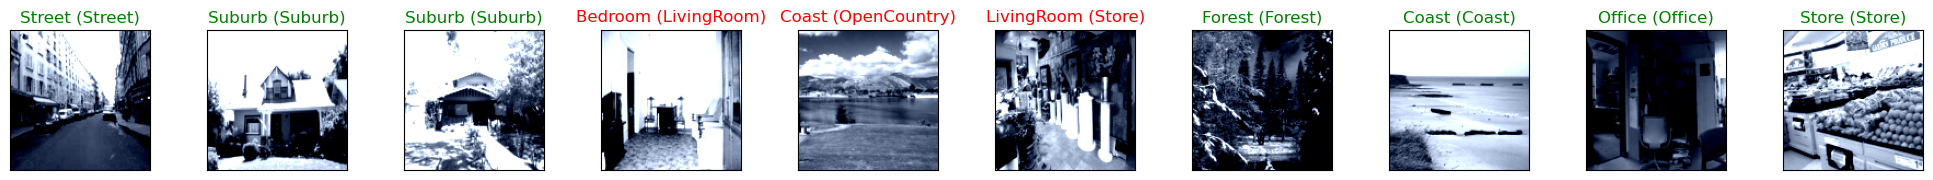

In [27]:
# Visualize the model
# Get one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
images.numpy()

# Move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()
else:
    images = images

# Get sample outputs
output = model(images)
# Convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    # Convert images to numpy for display
    images = images.cpu()
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx] == labels[idx].item() else "red"))


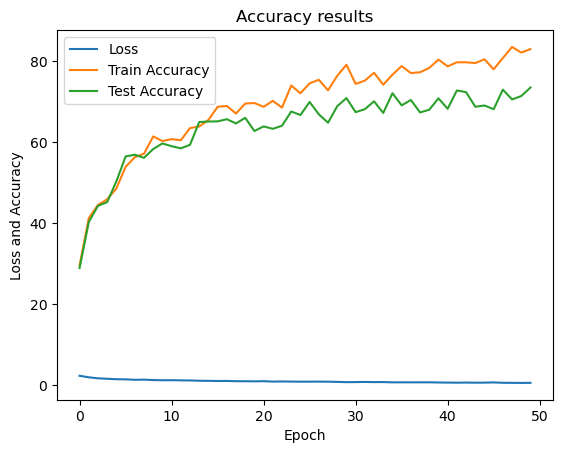

In [28]:
# Plot the loss and accuracy
t = np.arange(epochs)
lineobjects = plt.plot(t, epoch_loss, t, epoch_train_accuracy, t, epoch_test_accuracy)
plt.legend(iter(lineobjects), ('Loss', 'Train Accuracy', 'Test Accuracy'))
plt.xlabel('Epoch')
plt.ylabel('Loss and Accuracy')
plt.title('Accuracy results')

# Save the data
os.chdir('./data')

plt.savefig('accuracy_results.png')
plt.show()
